# Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import networkx as nx

In [3]:
adjacency = np.load("processed_data/coexpression_adjacency.npy")
node_indices = np.load("processed_data/coexpression_node_indices.npy")

## Properties of the graph

### Sparsity

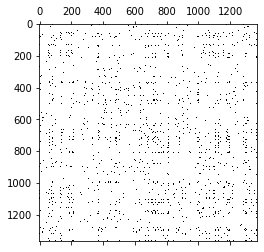

In [6]:
plt.spy(adjacency)
plt.show()

### Connected Components

In [7]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    D = np.diag(np.sum(adjacency, 1)) # Degree matrix
    combinatorial = D - adjacency
    if normalize:
        D_norm = np.diag(np.clip(np.sum(adjacency, 1), 1, None)**(-1/2))
        return D_norm @ combinatorial @ D_norm
    else:
        return combinatorial

In [8]:
laplacian_comb = compute_laplacian(adjacency, normalize=False)
laplacian_norm = compute_laplacian(adjacency, normalize=True)

In [9]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    return np.linalg.eigh(laplacian)

In [10]:
lamb_comb, U_comb = spectral_decomposition(laplacian_comb)
lamb_norm, U_norm = spectral_decomposition(laplacian_norm)

### Spectrum

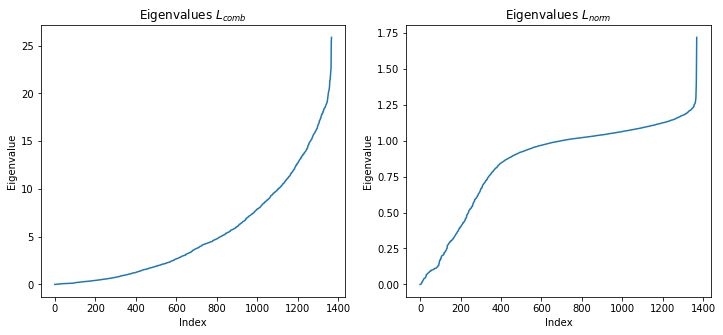

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(lamb_comb)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{comb}$')
plt.subplot(122)
plt.plot(lamb_norm)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{norm}$')
plt.show()

In [11]:
def compute_number_connected_components(lamb: np.array, threshold: float):
    """ lamb: array of eigenvalues of a Laplacian
        Return:
        n_components (int): number of connected components.
    """
    return np.count_nonzero(lamb <= threshold)

In [14]:
print("The number of connected components is",compute_number_connected_components(lamb_norm, threshold=1e-12))

The number of connected components is 1


### Diameter

In [18]:
path_matrix = np.zeros((adjacency.shape[0],adjacency.shape[0]))
for k in range(100):
    path_matrix += np.linalg.matrix_power(adjacency, k)
    if (path_matrix==0).sum() == 0:
        break    

diameter = k
print(f"The diameter is: {diameter}")

The diameter is: 20


### Degree Distribution

In [20]:
G_adjacency = nx.from_numpy_matrix(adjacency)

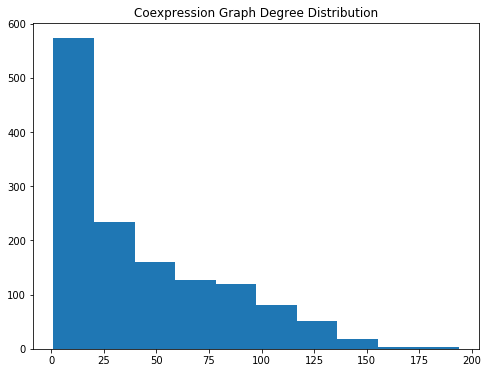

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
axes.set_title('Coexpression Graph Degree Distribution')
coexpression_degrees = [degree for node, degree in G_adjacency.degree()]
axes.hist(coexpression_degrees);

## Properties of the nodes

### Clustering Coefficient

In [35]:
print("The average clustering coefficient is", nx.average_clustering(G_adjacency))

The average clustering coefficient is 0.5382570187230082


It is a measure about the connectivity pattern of a node to its neighbors and gives us a hint about the network model.

## Analysis of the attributes

### Graph Fourier Transform